In [19]:
# Stock Market Next Day Closing Price Predictor
# This projkect analyses History for a stock over past years and based on that it tries to find the nexxt day closing price.
# We are using 2 algorithm for prediction. 1)SVM 2)LinearRegression 

import csv
import numpy as np
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import math
import time

In [20]:
# Reading Stcok History for a company from csv File
df = pd.read_csv('google.csv')
print(df.head())

        Date   Open   High    Low  Close    Volume
0  27-Jan-17  30.40  30.44  29.94  30.01  30005629
1  26-Jan-17  30.44  30.49  30.13  30.32  26767132
2  25-Jan-17  30.42  30.47  30.22  30.37  38131702
3  24-Jan-17  29.86  30.06  29.82  30.00  33686501
4  23-Jan-17  30.50  30.51  29.58  29.75  59093385


In [21]:
#df.hist()

In [23]:
# Next Day closing PRice will used as Y for our training.
# Creating dataset with one more column label with next day closing price which is Y for us
df['OC_Change']=(df['Close']-df['Open'])/df['Open']*100
df['HL_Change']=(df['High']-df['Low'])/df['High']*100
forecast_out= int(math.ceil(1))
df['Label']=df['Close'].shift(-forecast_out)
df=df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'OC_Change', 'HL_Change','Label']]
print(df.tail())

         Date   Open   High    Low  Close    Volume  OC_Change  HL_Change  \
245  8-Feb-16  28.22  28.27  27.76  28.17  47343080  -0.177179   1.804033   
246  5-Feb-16  29.15  29.20  28.30  28.54  51732948  -2.092624   3.082192   
247  4-Feb-16  28.65  29.46  28.49  29.18  53809002   1.849913   3.292600   
248  3-Feb-16  28.39  28.69  27.87  28.67  44163305   0.986263   2.858139   
249  2-Feb-16  28.27  28.29  27.92  28.24  39975038  -0.106120   1.307883   

     Label  
245  28.54  
246  29.18  
247  28.67  
248  28.24  
249    NaN  


In [26]:
df.dropna(inplace=True)
print(df.tail())

         Date   Open   High    Low  Close    Volume  OC_Change  HL_Change  \
244  9-Feb-16  27.75  28.54  27.75  28.28  36570398   1.909910   2.768045   
245  8-Feb-16  28.22  28.27  27.76  28.17  47343080  -0.177179   1.804033   
246  5-Feb-16  29.15  29.20  28.30  28.54  51732948  -2.092624   3.082192   
247  4-Feb-16  28.65  29.46  28.49  29.18  53809002   1.849913   3.292600   
248  3-Feb-16  28.39  28.69  27.87  28.67  44163305   0.986263   2.858139   

     Label  
244  28.17  
245  28.54  
246  29.18  
247  28.67  
248  28.24  


In [27]:
testDataSet=df.drop(['Date'],1)
X=np.array(testDataSet.drop(['Label'],1))
y=np.array(testDataSet['Label'])
print("Length of X 7 y: ", len(X), len(y))

Length of X 7 y:  249 249


In [28]:
def predict_priceSVR(X, y, inputValue):
    clf=SVR()
    clf.fit(X,y)
    result= clf.predict(inputValue)
    accuracy=clf.score(X, y)
    return result, accuracy

In [29]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)
print("Length of X_train & y_train: ",len(X_train), len(y_train))

Length of X_train & y_train:  174 174


In [31]:
y_predictedSVR=[]
accuracySVR=[]
count=0
for i in X_test: 
    new = np.reshape(i, (1,7))
    tempResult, accuracy= predict_priceSVR(X_train, y_train, new)
    #print("temp Result: ",tempResult)
    newy = np.reshape(y_test[count], (1,))
    
    X_train=np.concatenate((X_train, new), axis=0)
    y_train=np.concatenate((y_train, newy), axis=0)
    
    accuracySVR.append(accuracy)
    y_predictedSVR.append(tempResult)
    count=count+1

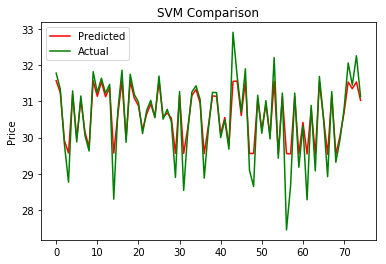

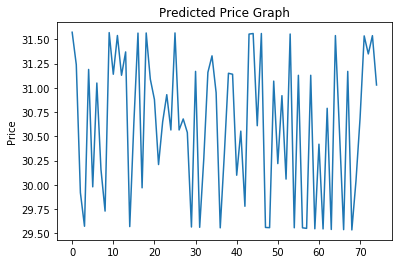

Accuracy Mean:  0.8769245720674342


In [32]:
plt.plot(y_predictedSVR,color= 'red', label= 'Predicted')
plt.plot(y_test, color= 'green', label= 'Actual')
plt.ylabel('Price')
plt.title('SVM Comparison')
plt.legend()
plt.show()

plt.plot(y_predictedSVR)
plt.ylabel('Price')
plt.title('Predicted Price Graph')
plt.show()
print("Accuracy Mean: ",np.average(accuracySVR))
#print("Predicted Value : ",y_predictedSVR)

In [33]:
def predict_priceLR(X, y, inputValue):
    clf=LinearRegression()
    clf.fit(X,y)
    result= clf.predict(inputValue)
    accuracy=clf.score(X, y)
    return result, accuracy

In [34]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3)
print("Length of X_train & y_train: ",len(X_train), len(y_train))

Length of X_train & y_train:  174 174


In [35]:
y_predictedLR=[]
accuracyLR=[]
count=0
for i in X_test: 
    new = np.reshape(i, (1,7))
    tempResult, accuracy= predict_priceLR(X_train, y_train, new)
    #print("temp Result: ",tempResult)
    newy = np.reshape(y_test[count], (1,))
    
    X_train=np.concatenate((X_train, new), axis=0)
    y_train=np.concatenate((y_train, newy), axis=0)
    
    accuracyLR.append(accuracy)
    y_predictedLR.append(tempResult)
    count=count+1

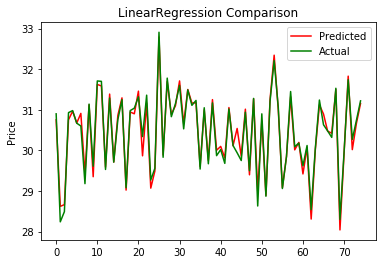

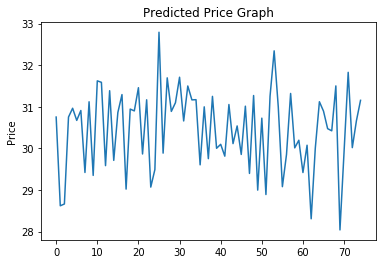

Accuracy Mean:  0.9735370662322047


In [36]:
plt.plot(y_predictedLR,color= 'red', label= 'Predicted')
plt.plot(y_test, color= 'green', label= 'Actual')
plt.ylabel('Price')
plt.title('LinearRegression Comparison')
plt.legend()
plt.show()

plt.plot(y_predictedLR)
plt.ylabel('Price')
plt.title('Predicted Price Graph')
plt.show()
print("Accuracy Mean: ",np.average(accuracyLR))